# Аналитика потребительского поведения и покупательских предпочтений при покупке товаров онлайн/офлайн

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
from urllib.parse import urlencode 

# используем api 
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/_L9xYFxfS-oO1A' 
 
# получаем url 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
 
# загружаем файл в df  
df = pd.read_csv(download_url) 

df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [2]:
Данный набор данных содержит информацию о потребительском поведении и покупательских предпочтениях
и включает в себя следующие поля:

Customer ID - Идентификатор клиента
Age - Возраст
Gender - Пол
Item Purchased - Приобретаемый товар
Category - Категория 
Purchase Amount (USD) - Сумма покупки (в долларах)
Location - Местоположение 
Size - Размер 
Color - Цвет 
Season - Сезон 
Review Rating - Рейтинг отзывов
Subscription Status - Статус подписки 
Shipping Type - Тип доставки
Discount Applied - Применена скидка
Promo Code Used - Использован промокод
Previous Purchases - Предыдущие покупки
Payment Method - Способ оплаты
Frequency of Purchases - Частота покупок

SyntaxError: invalid syntax (1590283045.py, line 1)

# EDA

In [3]:
df.shape

(3900, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [5]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [6]:
# Поиск нулевых значений
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [7]:
# Поиск дубликатов
df.duplicated().sum()

0

# График распределения суммы покупок по возрастным группам


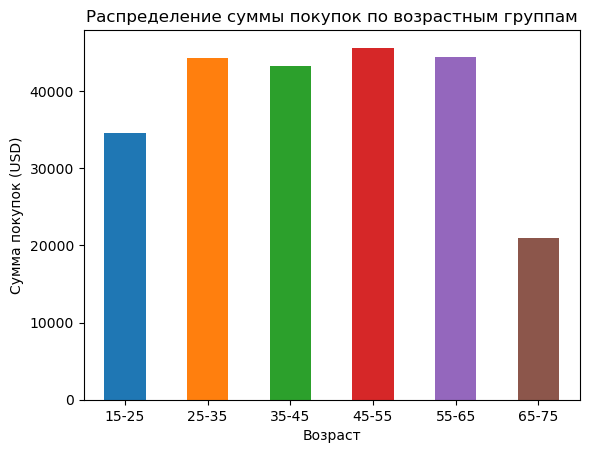

In [8]:
df_1 = df.copy()

df_1['segment'] = pd.cut(df['Age'], bins=[15, 25, 35, 45, 55, 65, 75], 
                         labels=['15-25', '25-35', '35-45', '45-55', '55-65', '65-75'])

purchase_amount_by_segment = df_1.groupby(['segment'], observed=True)['Purchase Amount (USD)'].sum()

purchase_amount_by_segment.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
plt.title('Распределение суммы покупок по возрастным группам')
plt.xlabel('Возраст')
plt.ylabel('Сумма покупок (USD)')
plt.xticks(rotation=0)
plt.show()

# График распределения типов приобретённого товара по полу

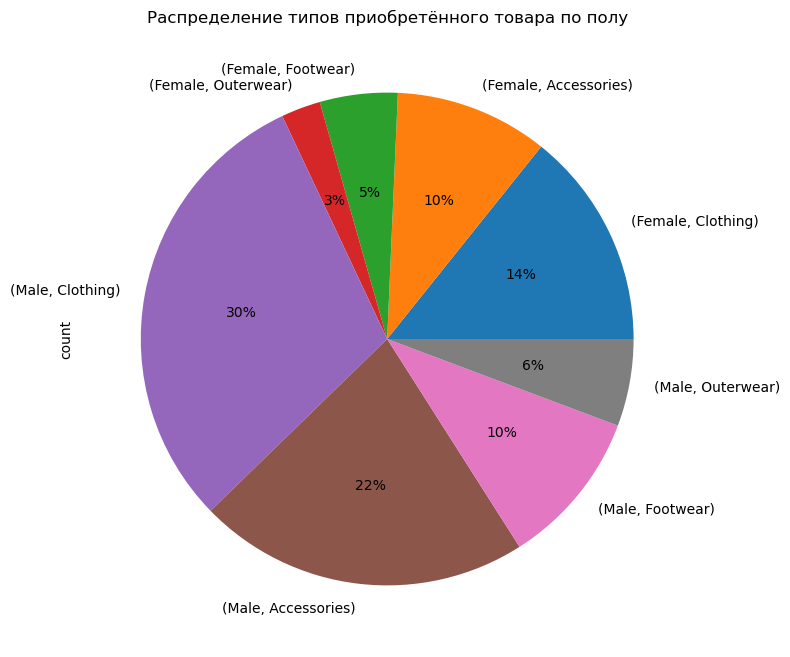

In [9]:
df_2 = df.copy()

gender_category = df_2.groupby(['Gender'])['Category'].value_counts()

plt.figure(figsize=(18, 8))
gender_category.plot(kind='pie', autopct='%1.f%%')
plt.title('Распределение типов приобретённого товара по полу')
plt.show()

# График распределения суммы покупок по сезонам

/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


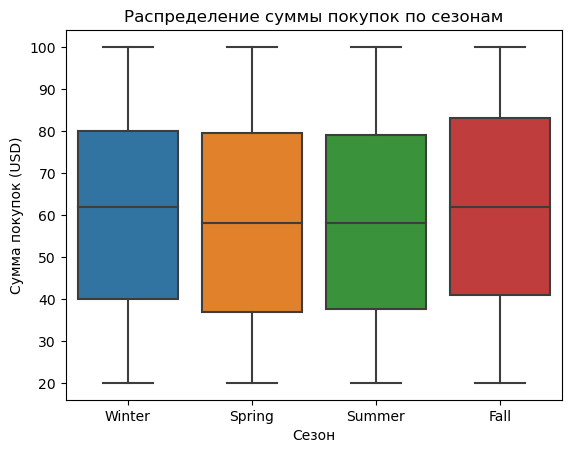

In [10]:
sns.boxplot(x='Season', y='Purchase Amount (USD)', data=df)
plt.xlabel('Сезон') 
plt.ylabel('Сумма покупок (USD)')
plt.title('Распределение суммы покупок по сезонам')
plt.show()

# График распределения клиентов по местоположению 

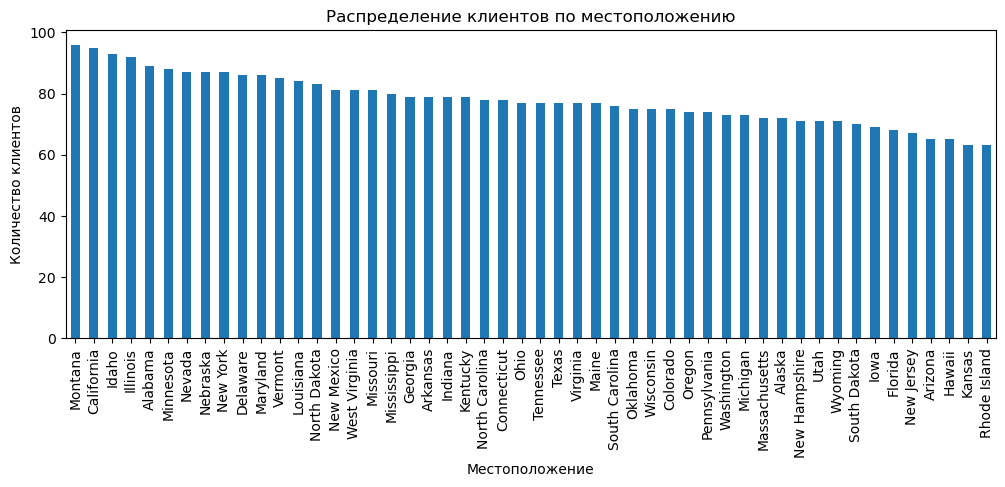

In [11]:
df_3 = df.copy()

count_client = df_3.groupby(['Location'])['Customer ID'].count().sort_values(ascending=False)

count_client.plot(kind='bar', figsize=(12, 4))
plt.title('Распределение клиентов по местоположению')
plt.xlabel('Местоположение')
plt.ylabel('Количество клиентов')
plt.show()

# График распределения суммы покупок по полу

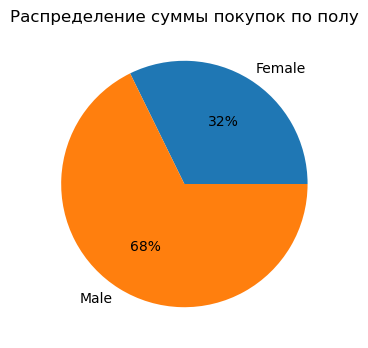

In [12]:
gender_purchase = df.groupby('Gender')['Purchase Amount (USD)'].sum()

fig, ax = plt.subplots(figsize=(8, 4))
ax.pie(gender_purchase, labels=gender_purchase.index, autopct='%1.f%%')
ax.set_title('Распределение суммы покупок по полу')
plt.show()

# График распределения количества покупок по каждому размеру

/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


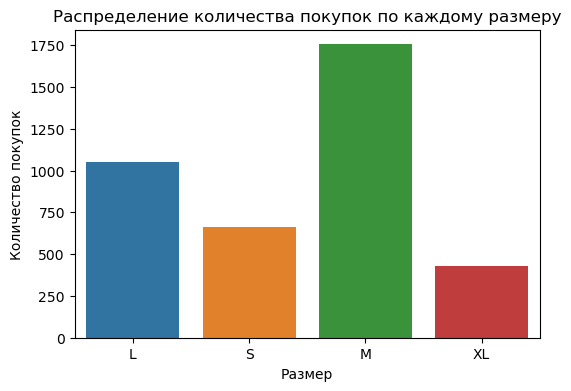

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Size',data=df)
plt.title('Распределение количества покупок по каждому размеру')
plt.xlabel('Размер')
plt.ylabel('Количество покупок')
plt.show()

# График распределения приобретаемых товаров по категориям 

/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

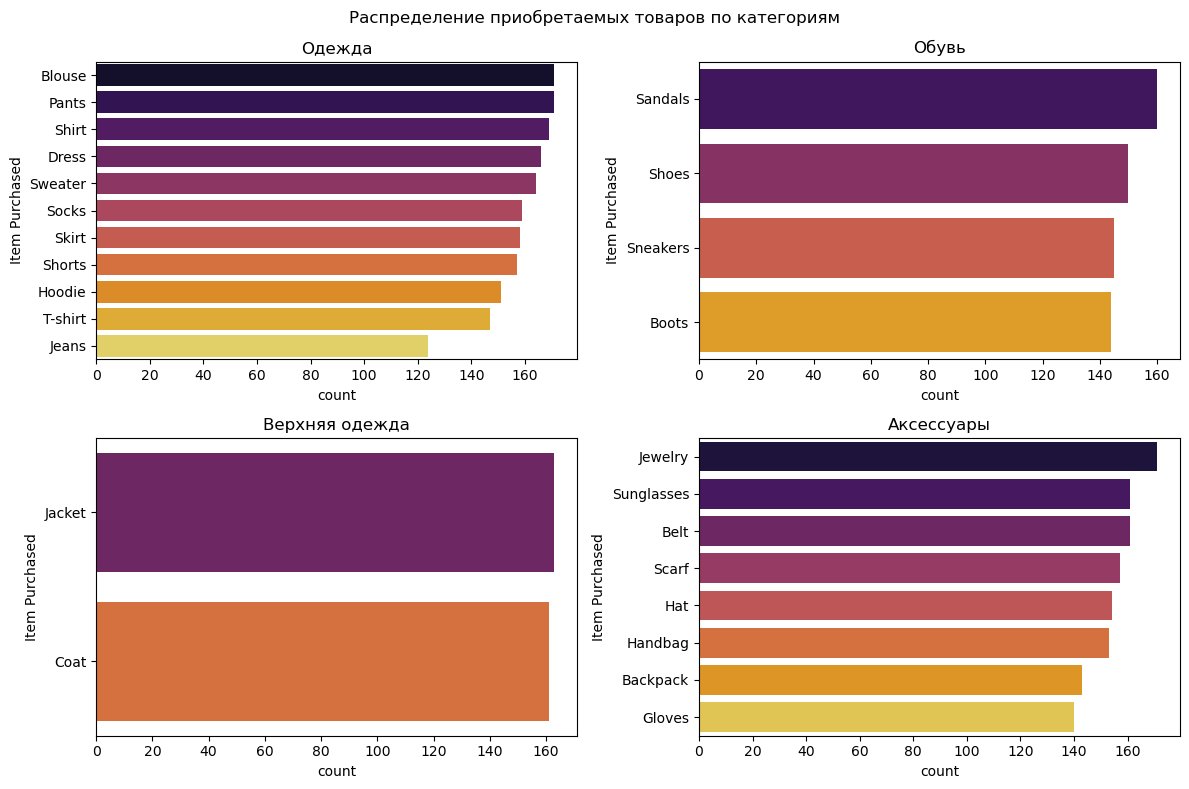

In [14]:
clothing = df[df['Category'] == 'Clothing'] 
footwear = df[df['Category'] == 'Footwear'] 
outerwear = df[df['Category'] == 'Outerwear'] 
accessories = df[df['Category'] == 'Accessories'] 

fig, ax = plt.subplots(2, 2, figsize=(12, 8)) 
fig.suptitle('Распределение приобретаемых товаров по категориям') 


sns.countplot(ax=ax[0, 0], data=clothing, y='Item Purchased', palette='inferno', order=clothing['Item Purchased'].value_counts().index) 
ax[0, 0].set_title('Одежда') 

sns.countplot(ax=ax[0, 1], data=footwear, y='Item Purchased', palette='inferno', order=footwear['Item Purchased'].value_counts().index) 
ax[0, 1].set_title('Обувь') 

sns.countplot(ax=ax[1, 0], data=outerwear, y='Item Purchased', palette='inferno', order=outerwear['Item Purchased'].value_counts().index) 
ax[1, 0].set_title('Верхняя одежда') 

sns.countplot(ax=ax[1, 1], data=accessories, y='Item Purchased', palette='inferno', order=accessories['Item Purchased'].value_counts().index) 
ax[1, 1].set_title('Аксессуары') 

plt.tight_layout() 
plt.show()

# График рейтинга товаров 

/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Приобретаемый товар')

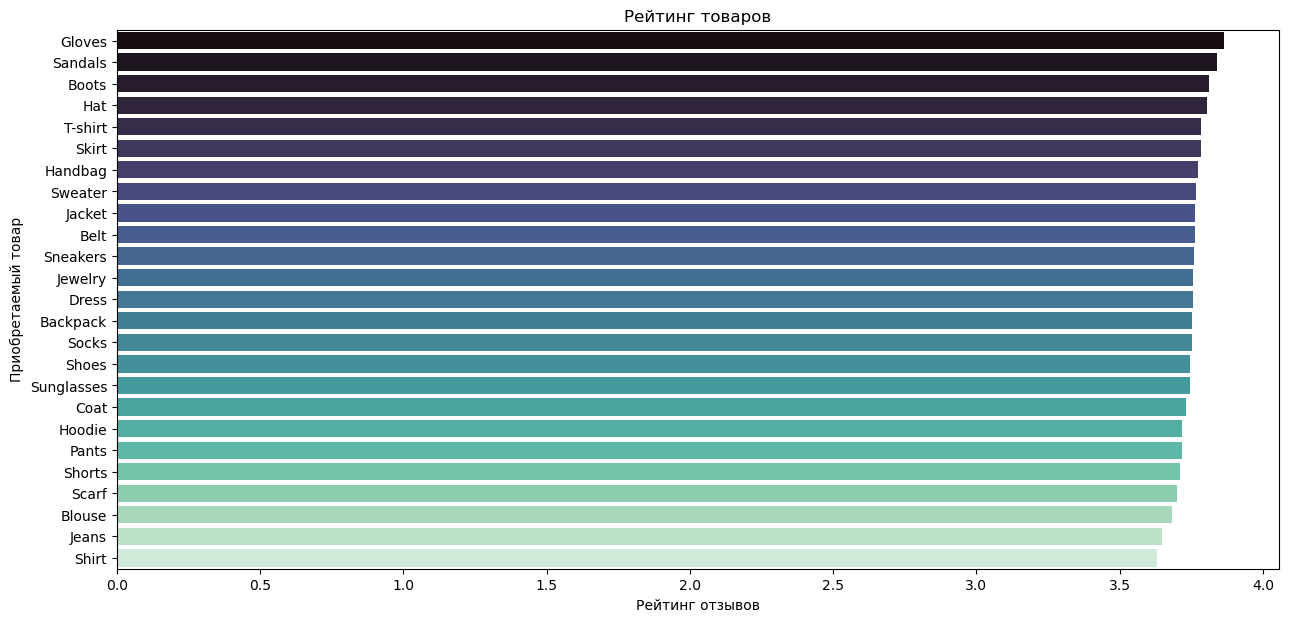

In [15]:
rating = df.groupby('Item Purchased')['Review Rating'].mean().sort_values(ascending=False).reset_index() 

plt.figure(figsize=(15,7)) 
sns.barplot(rating, x='Review Rating',y='Item Purchased', palette='mako')
plt.title('Рейтинг товаров') 
plt.xlabel('Рейтинг отзывов')
plt.ylabel('Приобретаемый товар')

# График распределения методов оплаты по возрастным группам

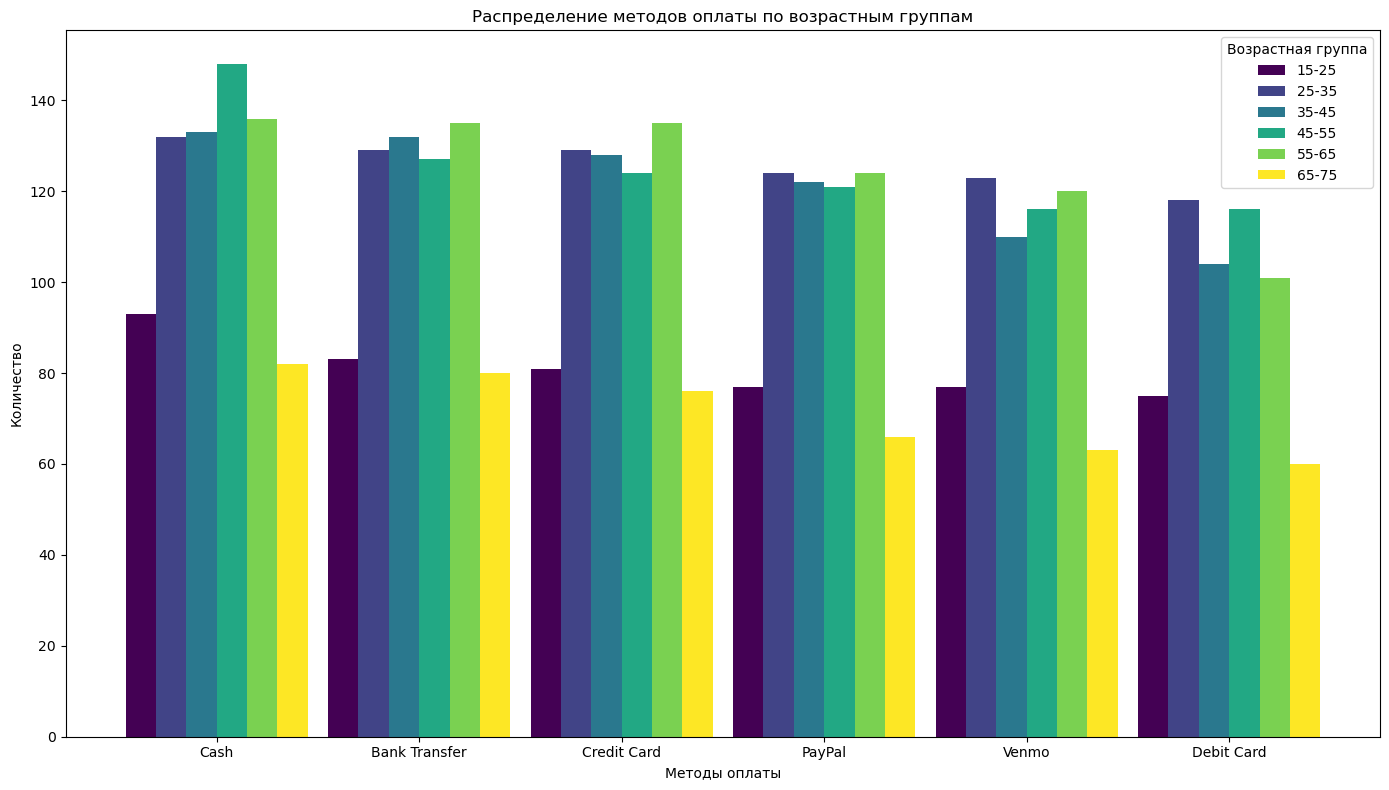

In [16]:
age_groups = [15, 25, 35, 45, 55, 65]

fig, ax = plt.subplots(figsize=(14, 8)) 

colors = plt.cm.viridis(np.linspace(0, 1, len(age_groups))) 
 
payment_method_counts_by_age = {age: [] for age in age_groups} 
 
for age in age_groups: 
    age_group_data = df[(df['Age'] >= age) & (df['Age'] < age + 10)] 
    payment_method_counts = age_group_data['Payment Method'].value_counts() 
    payment_method_counts_by_age[age] = payment_method_counts 

width = 0.15 
x = np.arange(len(payment_method_counts_by_age[age_groups[0]].index))

for i, age in enumerate(age_groups): 
    payment_method_counts = payment_method_counts_by_age[age] 
    ax.bar(x + i * width, payment_method_counts, width=width, label=f'{age}-{age+10}', color=colors[i]) 

ax.set_xlabel('Методы оплаты') 
ax.set_ylabel('Количество') 
ax.set_title('Распределение методов оплаты по возрастным группам') 
ax.set_xticks(x + width * (len(age_groups) - 1) / 2) 
ax.set_xticklabels(payment_method_counts_by_age[age_groups[0]].index) 
ax.legend(title='Возрастная группа') 

plt.tight_layout() 
plt.show()

# График распределения категорий товаров по возрастным группам


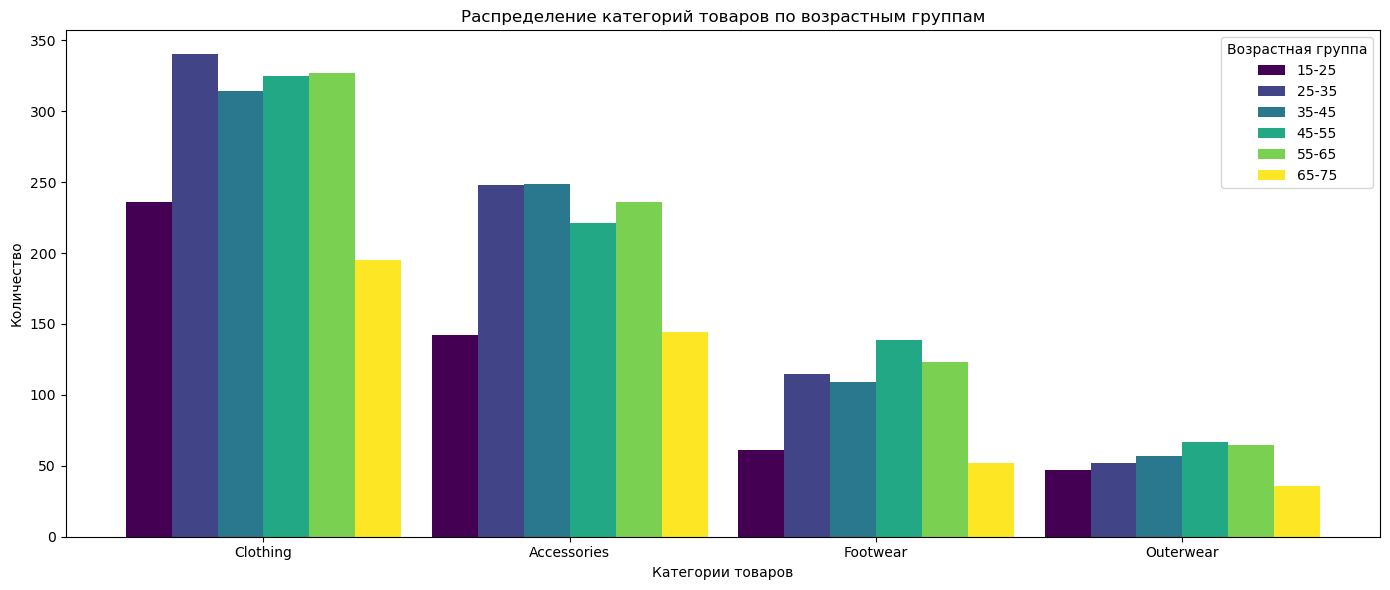

In [17]:
age_groups = [15, 25, 35, 45, 55, 65] 

fig, ax = plt.subplots(figsize=(14, 6)) 

colors = plt.cm.viridis(np.linspace(0, 1, len(age_groups))) 
 
category_counts_by_age = {age: [] for age in age_groups} 
 
for age in age_groups: 
    age_group_data = df[(df['Age'] >= age) & (df['Age'] < age + 10)] 
    category_counts = age_group_data['Category'].value_counts() 
    category_counts_by_age[age] = category_counts 

width = 0.15 
x = np.arange(len(category_counts_by_age[age_groups[0]].index))

for i, age in enumerate(age_groups): 
    category_counts = category_counts_by_age[age] 
    ax.bar(x + i * width, category_counts, width=width, label=f'{age}-{age+10}', color=colors[i]) 

ax.set_xlabel('Категории товаров') 
ax.set_ylabel('Количество') 
ax.set_title('Распределение категорий товаров по возрастным группам') 
ax.set_xticks(x + width * (len(age_groups) - 1) / 2) 
ax.set_xticklabels(category_counts_by_age[age_groups[0]].index) 
ax.legend(title='Возрастная группа') 

plt.tight_layout() 
plt.show()